In [21]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


2.2.0


In [22]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [23]:
import numpy as np
import h5py
import os

def loaddataH5():
  with h5py.File('/content/gdrive/My Drive/Colab/data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY=np.array(hf.get('trainY'))
    valX=np.array(hf.get('valX'))
    valY=np.array(hf.get('valY'))
    print(trainX.shape,trainY.shape)
    print(valX.shape,valY.shape)
  return trainX,trainY,valX,valY

trainX,trainY,testX,testY=loaddataH5()
# os.chdir('/content/gdrive/My Drive/Colab/')
# print(os.listdir())
# print(os.getcwd())

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [0]:

def baseline(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Max Pooling Layer
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # Densely connected layer
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  #softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model


def CNN1(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # softmax classifier
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def CNN1_dp(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  # softmax classifier
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model


def CNN2(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # convolution layers and max pooling
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (24, (1, 1), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='relu'))

  # softmax classifier
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def CNN2_dp(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # convolution layers and max pooling
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  model.add(tf.keras.layers.Conv2D (24, (1, 1), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  # fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  
  model.add(tf.keras.layers.Dense(10, activation='relu'))

  # softmax classifier
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def CNN3(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  
  # softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

  
def CNN3_dp(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same",  activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.Conv2D (24, (3, 3), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  # fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  
  # softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def plot(H):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 60), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 60), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()



In [38]:
model = baseline(width=128, height=128, depth=3, classes=17)

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 200)               52429000  
_________________________________________________________________
dense_37 (Dense)             (None, 17)                3417      
Total params: 52,434,209
Trainable params: 52,434,209
Non-trainable params: 0
_________________________________________________________________


Training network...


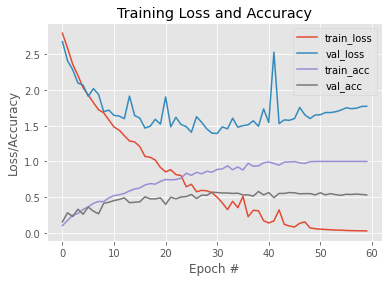

In [15]:
NUM_EPOCHS = 60
batch_size = 64
opt = tf.keras.optimizers.SGD(lr=0.01)
model = baseline(width=128, height=128, depth=3, classes=17)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose = 0)
plot(H)


In [39]:
m = CNN1(width=128, height=128, depth=3, classes=17)
m.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 64, 64, 24)        13848     
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 64, 64, 24)        5208      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 32, 32, 24)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 24576)           

Training network...


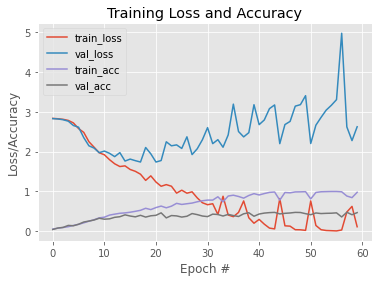

Training network with Drop out..


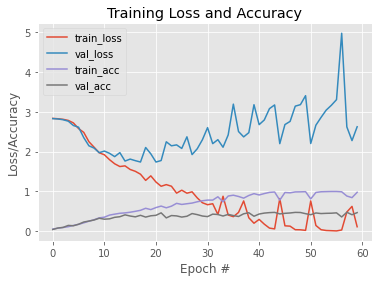

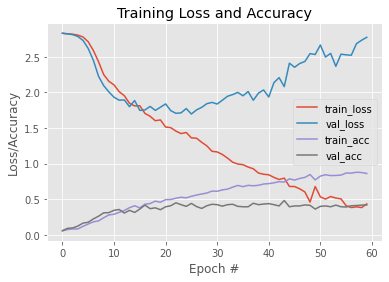

In [21]:
model1 = CNN1(width=128, height=128, depth=3, classes=17)
model1.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network...")
H1 = model1.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose = 0)
plot(H1)

model1_dp = CNN1_dp(width=128, height=128, depth=3, classes=17)
model1_dp.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network with Drop out..")
H1_dp = model1_dp.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose =0)
plot(H1)
plot(H1_dp)

In [40]:
m = CNN2(width=128, height=128, depth=3, classes=17)
m.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_152 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 64, 64, 24)        13848     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 32, 32, 24)        600       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 24)      

Training network...
Training network with drop out..


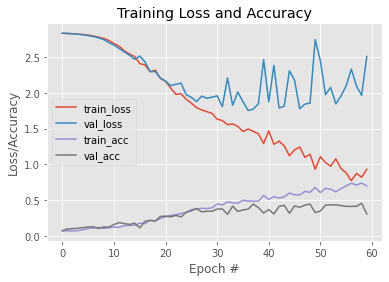

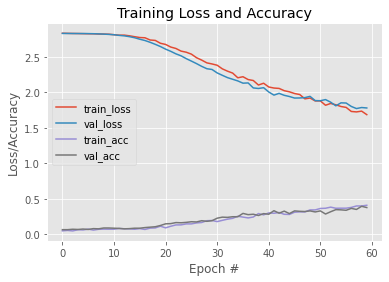

In [22]:
model2 = CNN2(width=128, height=128, depth=3, classes=17)
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network...")
H2 = model2.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose = 0)



model2_dp = CNN2_dp(width=128, height=128, depth=3, classes=17)
model2_dp.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network with drop out..")
H2_dp = model2_dp.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose = 0)
plot(H2)
plot(H2_dp)

In [41]:
m = model3 = CNN3(width=128, height=128, depth=3, classes=17)
m.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 64, 64, 24)        13848     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 64, 64, 24)        5208      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 32, 32, 24)      

Training network...
Training network with dropout...


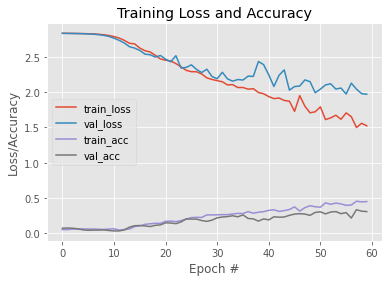

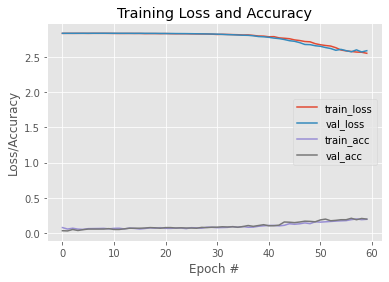

In [23]:
model3 = CNN3(width=128, height=128, depth=3, classes=17)
model3.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network...")
H3 = model3.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose = 0 )

model3_dp = CNN3_dp(width=128, height=128, depth=3, classes=17)
model3_dp.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("Training network with dropout...")
H3_dp = model3_dp.fit(trainX, trainY, validation_data=(testX, testY),	batch_size=batch_size, epochs=NUM_EPOCHS, verbose =0 )
plot(H3)
plot(H3_dp)

 Model 2 training... 
 Model 2 trained... 
 Model 3 training... 
 Model 3 trained... 
 Model 2 After Data Augmentation


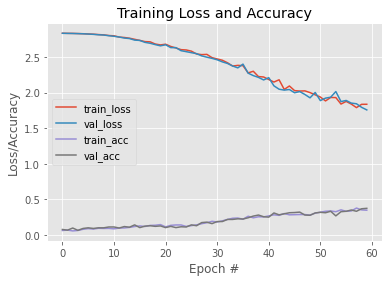

Model 2 After Data Augmentation with dropout


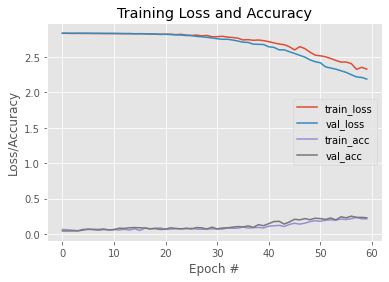

Model 3 after Data Augmentation


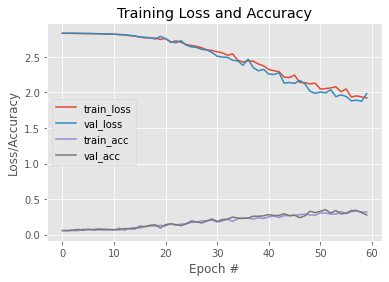

Model 3 After Data Augmentation with dropout


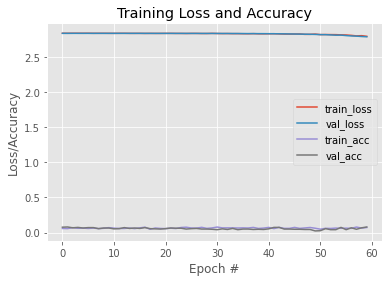

In [32]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)

train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=batch_size)

print(" Model 2 training... ")

model2_da = CNN2(width=128, height=128, depth=3, classes=17)

model2_da.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H2_data_aug = model2_da.fit(train_generator,
                        validation_data=(testX, testY), 
                        steps_per_epoch=len(trainX)// batch_size, 
                        epochs = NUM_EPOCHS , verbose =0 )



model2_da_dp = CNN2_dp(width=128, height=128, depth=3, classes=17)

model2_da_dp.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H2_data_aug_dp = model2_da_dp.fit(train_generator, 
                        validation_data=(testX, testY), 
                        steps_per_epoch=len(trainX)// batch_size, 
                        epochs = NUM_EPOCHS, verbose =0)

print(" Model 2 trained... ")

print(" Model 3 training... ")

model3_da = CNN3(width=128, height=128, depth=3, classes=17)

model3_da.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


H3_data_aug = model3_da.fit(train_generator ,
                        validation_data=(testX, testY), 
                        steps_per_epoch=len(trainX)// batch_size, 
                        epochs = NUM_EPOCHS, verbose =0)

model3_da_dp = CNN3_dp(width=128, height=128, depth=3, classes=17)

model3_da_dp.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H3_data_aug_dp = model3_da_dp.fit(train_generator, validation_data=(testX, testY), steps_per_epoch=(len(trainX)// batch_size), 
                        epochs = NUM_EPOCHS, verbose =0)

print(" Model 3 trained... ")

print(" Model 2 After Data Augmentation")
plot(H2_data_aug)
print("Model 2 After Data Augmentation with dropout")
plot(H2_data_aug_dp)
print("Model 3 after Data Augmentation")
plot(H3_data_aug)
print("Model 3 After Data Augmentation with dropout")
plot(H3_data_aug_dp)

Ensemble Methods


In [0]:
def vgg16(width, height, depth, classes):
    model = tf.keras.Sequential() 
    inputShape = (height, width, depth)

    # convolution layers and max pooling
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same",  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))

    return model 

number_of_networks = 3 
models = []
for i in range(number_of_networks):
    models.append(vgg16(width=128, height=128, depth=3, classes=17))



In [0]:
def plot(H):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 60), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 60), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()
def trainmodel(model, i):
  NUM_EPOCHS = 60
  print("Compiling model...")
  opt = tf.keras.optimizers.SGD(lr=0.01)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  fname = "/content/gdrive/My Drive/Colab/weights_of{}.hdf5".format(i+1)

  checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

  print("Training base learner ",i+1,"..." )
  hist = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=16, 
                epochs=NUM_EPOCHS, callbacks=[checkpoint], verbose = 0)
  print("Training Completed")
  print("Plot of base learner:", i+1)
  plot(hist)
  
    



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 256)      

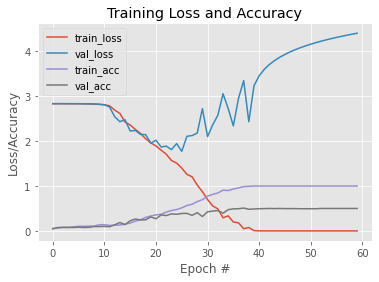

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 256)     

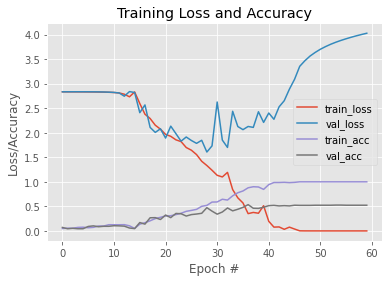

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 32, 32, 256)     

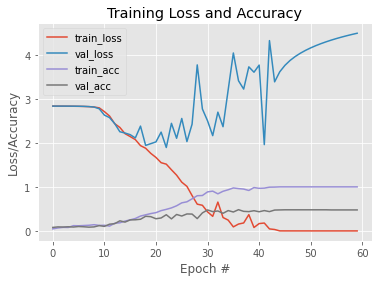

In [27]:
for i in range(number_of_networks):
  print(models[i].summary())
  trainmodel(models[i], i)


In [0]:
outputs = []

for i in range(number_of_networks):
  
  models[i].load_weights("/content/gdrive/My Drive/Colab/weights_of{}.hdf5".format(i+1))
  opt = tf.keras.optimizers.SGD(lr=0.01)
  models[i].compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  outputs.append(models[i].predict(testX))
  print("Accuracy for base learner ", i+1 , ": ", "")


In [37]:

final_output = (outputs[0] + outputs[1] + outputs[2] )/3
final_output_labels = np.argmax(final_output, axis =1 )
accuracy = (final_output_labels == testY).mean()
print("Ensemble model accuracy: ")
print(accuracy)

0.4647058823529412
